# Statistique  bivariée

Analyse des relations entre deux variables à l’aide de tableaux synthétiques et graphiques.

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
try:
    import seaborn as sns
    sns.set(style="whitegrid")
except:
    sns = None

df = pd.read_csv("Employers_data.csv",sep=";")
df.head()


,Employee_ID,Name,Age,Gender,Department,Job_Title,Experience_Years,Education_Level,Location,Salary
0,1,Merle Ingram,24,Female,Engineering,Engineer,1,Master,Austin,90000
1,2,John Mayes,56,Male,Sales,Executive,33,Master,Seattle,195000
2,3,Carlos Wille,21,Male,Engineering,Intern,1,Bachelor,New York,35000
3,4,Michael Bryant,30,Male,Finance,Analyst,9,Bachelor,New York,75000
4,5,Paula Douglas,25,Female,HR,Analyst,2,Master,Seattle,70000


In [4]:
df.head()

,Employee_ID,Name,Age,Gender,Department,Job_Title,Experience_Years,Education_Level,Location,Salary
0,1,Merle Ingram,24,Female,Engineering,Engineer,1,Master,Austin,90000
1,2,John Mayes,56,Male,Sales,Executive,33,Master,Seattle,195000
2,3,Carlos Wille,21,Male,Engineering,Intern,1,Bachelor,New York,35000
3,4,Michael Bryant,30,Male,Finance,Analyst,9,Bachelor,New York,75000
4,5,Paula Douglas,25,Female,HR,Analyst,2,Master,Seattle,70000


In [5]:
df.tail()

,Employee_ID,Name,Age,Gender,Department,Job_Title,Experience_Years,Education_Level,Location,Salary
9995,9996,Thomas Rossin,51,Male,Sales,Executive,28,Master,Austin,185000
9996,9997,Christie King,36,Female,Sales,Executive,9,PhD,San Francisco,165000
9997,9998,Alfred Keller,57,Male,Sales,Executive,30,PhD,New York,200000
9998,9999,Margaret Gomez,37,Female,Engineering,Manager,14,Master,New York,135000
9999,10000,Joan Sorensen,25,Female,Sales,Analyst,4,Bachelor,San Francisco,70000


## 🧭 Récap des méthodes bivariées 

| Relation | Exemple | Indicateurs | Graphiques |
|---------|---------|-------------|------------|
| QUANTI ↔ QUANTI | revenu_mensuel ↔ montant_panier | covariance, corrélation | scatter plot |
| QUALI ↔ QUANTI (2 modalités) | sexe ↔ montant_panier | moyennes par groupe | boxplot, violin plot |
| QUALI ↔ QUANTI (3+ modalités) | segment_age ↔ montant_panier | moyennes par groupe | boxplot, barplot |
| QUALI ↔ QUALI | sexe ↔ retour_produit | table de contingence | countplot, heatmap |


# CAS 1 — QUANTI ↔ QUANTI
   Exemple : Salary ↔ age

###  Tableau synthétique

| Élément | Contenu |
|--------|---------|
| Variables | Salary (X), Age (Y) |
| Indicateurs | Covariance, Corrélation |
| Graphique | Scatter plot |
| Objectif | Voir la force et le sens de la relation |


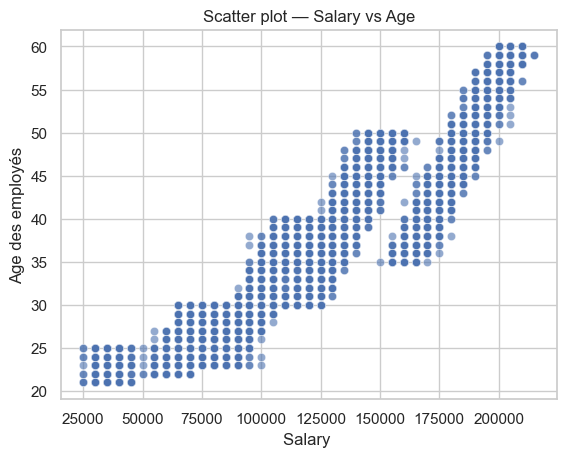

In [10]:
import numpy as np
from scipy import stats

# Variables quantitatives
A= df["Salary"]
B= df["Age"]


plt.figure()
if sns: sns.scatterplot(x=A, y=B, alpha=0.6)
else: plt.scatter(A, B, alpha=0.6)
plt.xlabel("Salary ")
plt.ylabel("Age des employés")
plt.title("Scatter plot — Salary vs Age")
plt.show()

In [11]:

# --- Covariance ---
cov_xy = np.cov(x, y, ddof=1)[0, 1]

# --- Corrélation de Pearson ---
pearson_r, pearson_p = stats.pearsonr(x, y)

# --- Corrélation de Spearman (monotone) ---
spearman_rho, spearman_p = stats.spearmanr(x, y)

# --- Corrélation de Kendall (τ) ---
kendall_tau, kendall_p = stats.kendalltau(x, y)

print(" Covariance :", cov_xy)
print(f" Corrélation de Pearson : r = {pearson_r:.3f} (p = {pearson_p:.3e})")
print(f" Corrélation de Spearman : ρ = {spearman_rho:.3f} (p = {spearman_p:.3e})")
print(f" Corrélation de Kendall : τ = {kendall_tau:.3f} (p = {kendall_p:.3e})")

 Covariance : 427483.3224822474
 Corrélation de Pearson : r = 0.928 (p = 0.000e+00)
 Corrélation de Spearman : ρ = 0.940 (p = 0.000e+00)
 Corrélation de Kendall : τ = 0.814 (p = 0.000e+00)


# Interprétation de la covariance et des corrélations


| Mesure | Valeurs possibles | Interprétation du signe | Interprétation de l’amplitude | Quand l’utiliser ? |
|--------|-------------------|-------------------------|-------------------------------|---------------------|
| **Covariance** | -∞ → +∞ | Cov > 0 : X↑ → Y↑ (relation positive)  <br> Cov < 0 : X↑ → Y↓ (relation négative) <br> Cov ≈ 0 : pas de relation linéaire détectée | Impossible à comparer entre variables car dépend des unités | Pour savoir si les deux variables évoluent dans le même sens (mais pas pour mesurer l'intensité) |
| **Corrélation de Pearson** | -1 → +1 | r > 0 : relation linéaire positive <br> r < 0 : relation linéaire négative <br> r = 0 : pas de relation linéaire | |r| proche de 1 : relation forte <br> |r| ≈ 0.5 : relation modérée <br> |r| < 0.2 : relation très faible | Lorsque la relation est **linéaire** et que les variables sont relativement symétriques ou normales |
| **Corrélation de Spearman (ρ)** | -1 → +1 | Signe interprété comme Pearson | |ρ| proche de 1 : forte relation **monotone** | Lorsque la relation n’est pas linéaire mais **monotone** (croissante ou décroissante), ou en présence d’outliers |
| **Corrélation de Kendall (τ)** | -1 → +1 | Signe interprété comme Pearson | |τ| < ρ < r en général. <br> τ proche de 1 = forte concordance des rangs | Lorsque l’échantillon est **petit**, ou lorsque l’on veut une mesure robuste de concordance |



##  Comment interpréter la force d’une corrélation ?

| Valeur absolue | Interprétation |
|----------------|----------------|
| **0.00 – 0.19** | Très faible ou nulle |
| **0.20 – 0.39** | Faible |
| **0.40 – 0.59** | Modérée |
| **0.60 – 0.79** | Forte |
| **0.80 – 1.00** | Très forte |



##  À retenir

- La **covariance** indique seulement si X et Y varient **dans le même sens**.  
- Les **corrélations** normalisent la covariance et deviennent **comparables** et **interprétables**.  
- **Pearson** = linéaire, **Spearman** = monotone, **Kendall** = robuste.




#  CAS 2 — QUALI ↔ QUANTI
##Deux modalités (ex : Gendar → Salary)


###  Tableau synthétique

| Élément | Contenu |
|--------|---------|
| Variables | Gender, Age |
| Indicateurs | Moyennes par catégorie |
| Graphiques | Boxplot, violin plot |
| Objectif | Comparer deux groupes |


In [13]:
df.groupby("Gender")["Age"].agg(
    moyenne = "mean",
    mediane = "median",
    variance = "var",
    ecart_type = "std",
    minimum = "min",
    Q1 = lambda x: x.quantile(0.25),
    Q2 = "median",
    Q3 = lambda x: x.quantile(0.75),
    maximum = "max",
    IQR = lambda x: x.quantile(0.75) - x.quantile(0.25),
    etendue = lambda x: x.max() - x.min()
)

,moyenne,mediane,variance,ecart_type,minimum,Q1,Q2,Q3,maximum,IQR,etendue
Gender,,,,,,,,,,,
Female,35.300286,34.0,100.471863,10.023565,21,27.0,34.0,43.0,60,16.0,39
Male,35.604933,35.0,99.530596,9.976502,21,27.0,35.0,43.0,60,16.0,39


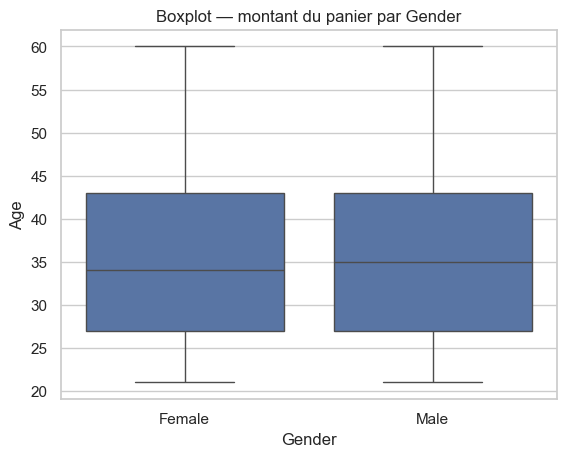

In [16]:

plt.figure()
if sns:
    sns.boxplot(x="Gender", y="Age", data=df)
else:
    groups = [g["Age"].values for _, g in df.groupby("Gender")]
    labels = df["Gender"].unique()
    plt.boxplot(groups, labels=labels)
plt.title("Boxplot — montant du panier par Gender")
plt.show()

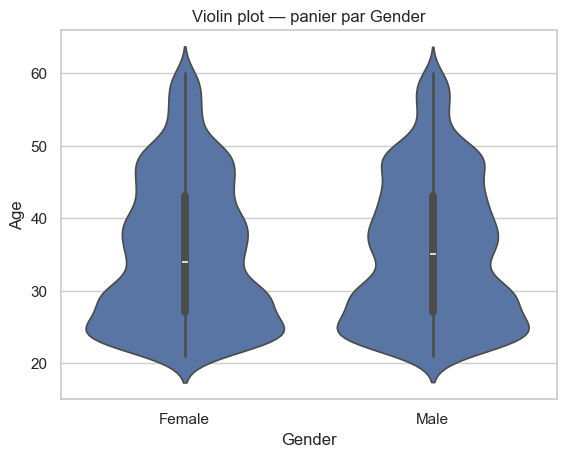

In [19]:
if sns:
    plt.figure()
    sns.violinplot(x="Gender", y="Age", data=df)
    plt.title("Violin plot — panier par Gender")
    plt.show()


 | Élément | Contenu |
|--------|---------|
| Variables | salary, Age |
| Indicateurs | Moyennes par groupe |
| Graphiques | Boxplot, barplot |
| Objectif | Comparer plusieurs groupes |


In [25]:
df.groupby("Education_Level")["Age"].agg(
    moyenne = "mean",
    mediane = "median",
    variance = "var",
    ecart_type = "std",
    minimum = "min",
    Q1 = lambda x: x.quantile(0.25),
    Q2 = "median",
    Q3 = lambda x: x.quantile(0.75),
    maximum = "max",
    IQR = lambda x: x.quantile(0.75) - x.quantile(0.25),
    etendue = lambda x: x.max() - x.min()
)



,moyenne,mediane,variance,ecart_type,minimum,Q1,Q2,Q3,maximum,IQR,etendue
Education_Level,,,,,,,,,,,
Bachelor,26.585330,26.0,16.912613,4.112495,21,24.0,26.0,29.0,40,5.0,19
Master,38.961460,39.0,83.867859,9.157940,23,32.0,39.0,46.0,60,14.0,37
PhD,42.980462,43.0,63.470590,7.966843,27,37.0,43.0,49.0,60,12.0,33


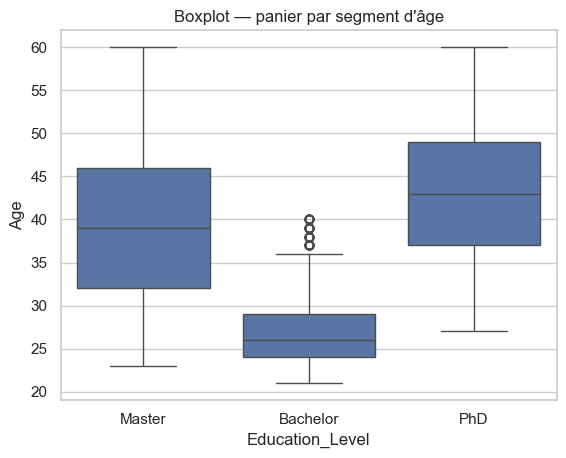

In [26]:
plt.figure()
if sns:
    sns.boxplot(x="Education_Level", y="Age", data=df)
plt.title("Boxplot — panier par segment d'âge")
plt.show()


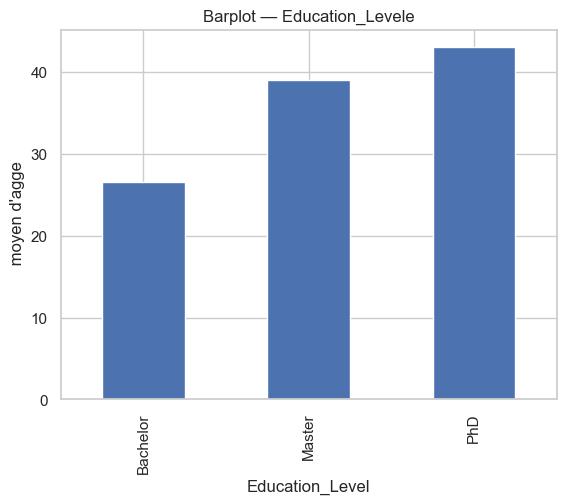

In [27]:
means = df.groupby("Education_Level")["Age"].mean()
plt.figure()
means.plot(kind="bar")
plt.ylabel(" moyen d'agge")
plt.title("Barplot — Education_Levele")
plt.show()



# CAS 3 — QUALI ↔ QUALI  
**Exemple : Genre↔ niveau 
'education**


In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Employee_ID       10000 non-null  int64 
 1   Name              10000 non-null  object
 2   Age               10000 non-null  int64 
 3   Gender            10000 non-null  object
 4   Department        10000 non-null  object
 5   Job_Title         10000 non-null  object
 6   Experience_Years  10000 non-null  int64 
 7   Education_Level   10000 non-null  object
 8   Location          10000 non-null  object
 9   Salary            10000 non-null  int64 
dtypes: int64(4), object(6)
memory usage: 781.4+ KB



###  Tableau synthétique

| Élément | Contenu |
|--------|---------|
| Variables | sexe, niveau d'education |
| Indicateurs | Table de contingence |
| Graphiques | Countplot, heatmap |
| Objectif | Examiner l'association entre deux catégories |


In [32]:
Tableau_contegence=pd.crosstab(df["Gender"],df["Education_Level"])

In [47]:
Tableau_contegence

Education_Level,Bachelor,Master,PhD
Gender,,,
Female,1692,2388,812
Male,1689,2542,877


In [48]:
Tableau_contegence.describe

<bound method NDFrame.describe of Education_Level  Bachelor  Master  PhD
Gender                                
Female               1692    2388  812
Male                 1689    2542  877>

In [49]:
Tableau_contegence.value_counts().reset_index()

,Bachelor,Master,PhD,count
0,1689,2542,877,1
1,1692,2388,812,1


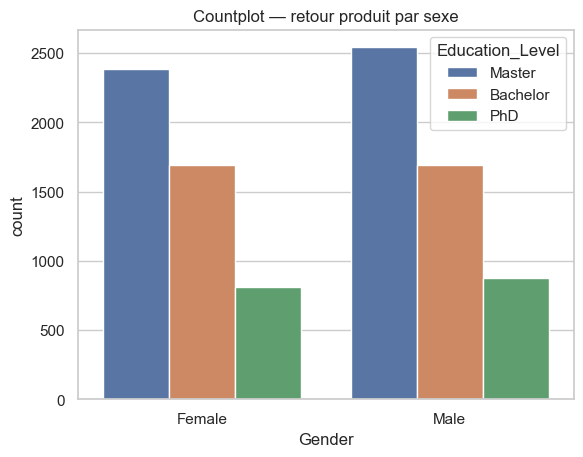

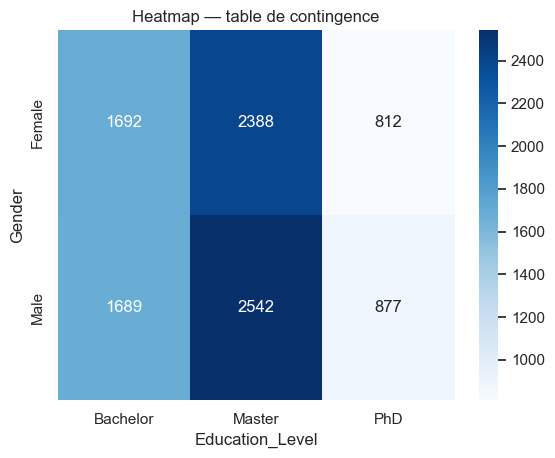

In [52]:
if sns:
    plt.figure()
    sns.countplot(x="Gender", hue="Education_Level", data=df)
    plt.title("Countplot — retour produit par sexe")
    plt.show()

    plt.figure()
    sns.heatmap(Tableau_contegence, annot=True, fmt="d", cmap="Blues")
    plt.title("Heatmap — table de contingence")
    plt.show()

In [57]:
  # Table de contingence brute
Tableau_contegence=pd.crosstab(df["Gender"],df["Education_Level"])

# Table des proportions (chaque ligne = 100%)
Tableau_contegence = Tableau_contegence.div(Tableau_contegence.sum(axis=1), axis=0) * 100

Tableau_contegence


Education_Level,Bachelor,Master,PhD
Gender,,,
Female,34.587081,48.814391,16.598528
Male,33.065779,49.765074,17.169146


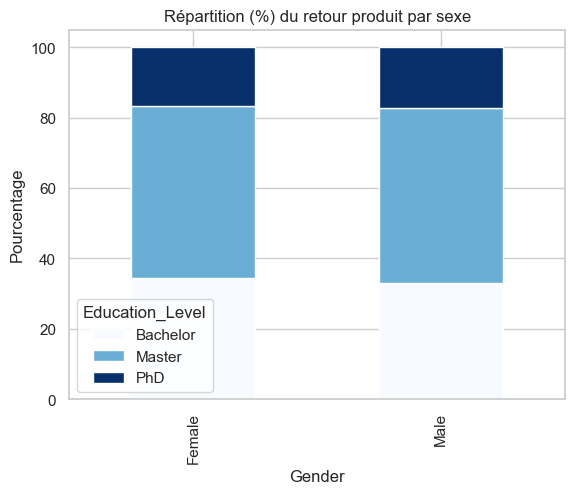

In [59]:
Tableau_contegence.plot(kind="bar", stacked=True, colormap="Blues")
plt.title("Répartition (%) du retour produit par sexe")
plt.ylabel("Pourcentage")
plt.show()


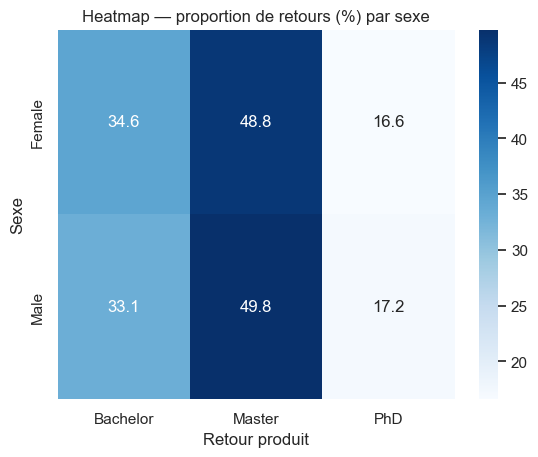

In [60]:
plt.figure()
sns.heatmap(Tableau_contegence, annot=True, fmt=".1f", cmap="Blues")
plt.title("Heatmap — proportion de retours (%) par sexe")
plt.ylabel("Sexe")
plt.xlabel("Retour produit")
plt.show()


#  Récapitulatif 

- **QUANTI ↔ QUANTI** : covariance, corrélation, scatter plot  
- **QUALI ↔ QUANTI (2 modalities)** : moyennes par groupe, boxplot, violin plot  
- **QUALI ↔ QUANTI (3+ modalities)** : moyennes par groupe, boxplot, barplot  
- **QUALI ↔ QUALI** : table de contingence, countplot, heatmap  


